In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon


In [57]:
df = pd.read_csv('data/train.csv')
plt.style.use('default')
plt.rcParams['figure.figsize'] = [12.0,8.0]

In [58]:
antiguedad = df.dropna(subset=["antiguedad"])

In [59]:
def fix_state_names(state_name):
    fix_these = {
        'México': 'Edo. de México',
        'San Luis Potosí': 'San luis Potosí',
        'Baja California': 'Baja California Norte'
    }
    
    return fix_these.get(state_name, state_name)


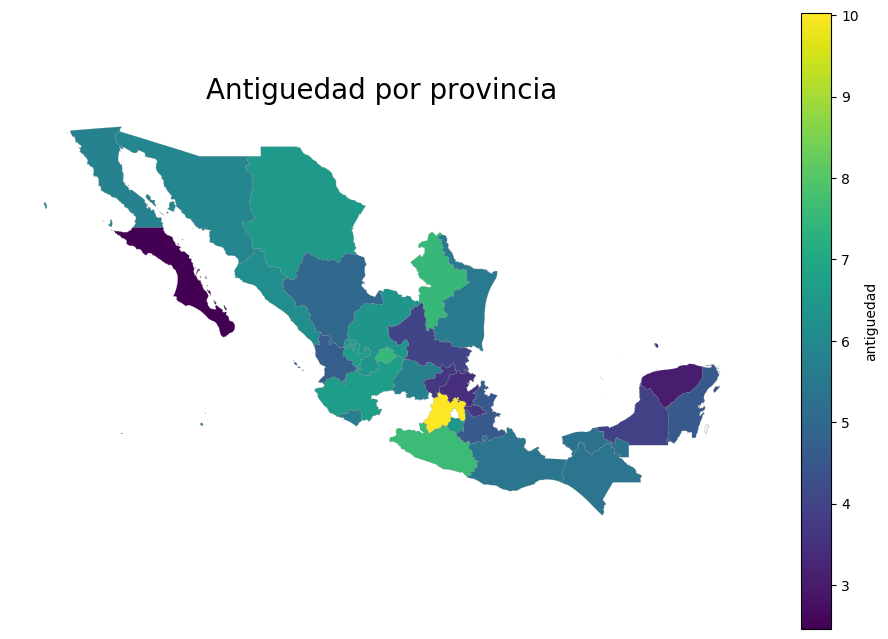

In [60]:
mexico = gpd.read_file('data/shapes/MEX_adm1.shp')

#mexico = mexico.rename(columns={"Name":"NAME_1"})

mexico['NAME_1'] = mexico['NAME_1'].map(fix_state_names)

media_antiguedad_por_provincia = antiguedad.groupby('provincia').agg({'antiguedad': 'mean'})\
                        .reset_index().rename(columns={'antiguedad': 'avg antiguedad'})\
                        .sort_values('avg antiguedad', ascending=False)

mexico = pd.merge(left=mexico, right=media_antiguedad_por_provincia, left_on='NAME_1', right_on='provincia')

vmin = mexico['avg antiguedad'].min()
vmax = mexico['avg antiguedad'].max()

fig, ax = plt.subplots()
mexico.plot(ax=ax, column='avg antiguedad', cmap='viridis', linewidth=0.1, edgecolor='0.5')
ax.set_title('Antiguedad por provincia', fontsize=20)
ax.axis('off')

sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm._A = []
cbar = fig.colorbar(sm)
cbar.set_label('antiguedad');

## Analisis de ambientes

In [61]:
df["ambientes_totales"]= df["banos"].values+df["habitaciones"].values+df["garages"].values

In [62]:
ambientes_por_provincia = df.groupby('provincia').agg({'ambientes_totales': 'mean',"id":"count"})\
                        .reset_index().rename(columns={'ambientes_totales': 'avg ambientes_totales'})\
                        .sort_values('avg ambientes_totales', ascending=False)


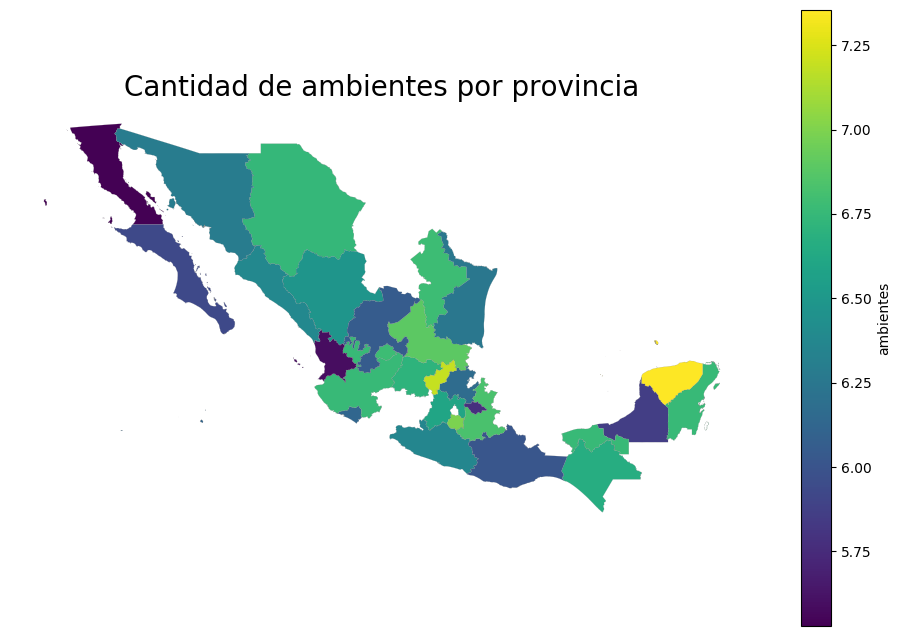

In [63]:
mexico = gpd.read_file('data/shapes/MEX_adm1.shp')

#mexico = mexico.rename(columns={"Name":"NAME_1"})

mexico['NAME_1'] = mexico['NAME_1'].map(fix_state_names)

mexico = pd.merge(left=mexico, right=ambientes_por_provincia , left_on='NAME_1', right_on='provincia')

vmin = mexico['avg ambientes_totales'].min()
vmax = mexico['avg ambientes_totales'].max()

fig, ax = plt.subplots()
mexico.plot(ax=ax, column='avg ambientes_totales', cmap='viridis', linewidth=0.1, edgecolor='0.5')
ax.set_title('Cantidad de ambientes por provincia', fontsize=20)
ax.axis('off')

sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm._A = []
cbar = fig.colorbar(sm)
cbar.set_label('ambientes');